In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import warnings; warnings.simplefilter('ignore')
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import collections
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt













In [20]:
pwd


'C:\\Users\\TARUN REDDY A\\Desktop\\deployment'

In [21]:
brent=pd.read_csv("BrentOilPrices.csv")

brent.head()


,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [22]:
brent['Date']=pd.to_datetime(brent['Date'],infer_datetime_format=True)
index=brent.set_index(['Date'])


In [23]:
from datetime import datetime
index.head(5)

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


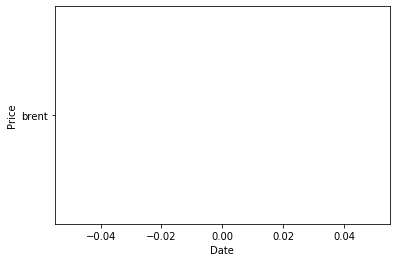

In [24]:
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot('brent')

In [25]:
brent.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8360 entries, 0 to 8359
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    8360 non-null   datetime64[ns]
 1   Price   8360 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 130.8 KB


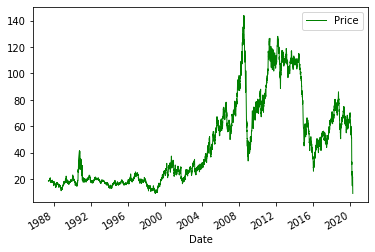

In [26]:
brent[['Date','Price']].set_index('Date').plot(color="green", linewidth=1.0)

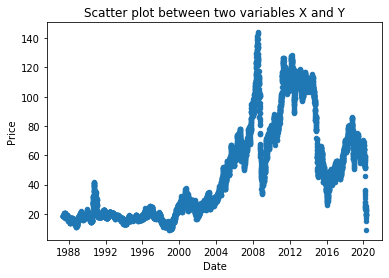

In [27]:
brent.plot.scatter(x='Date', y='Price', title= "Scatter plot between two variables X and Y");

plt.show(block=True);

 

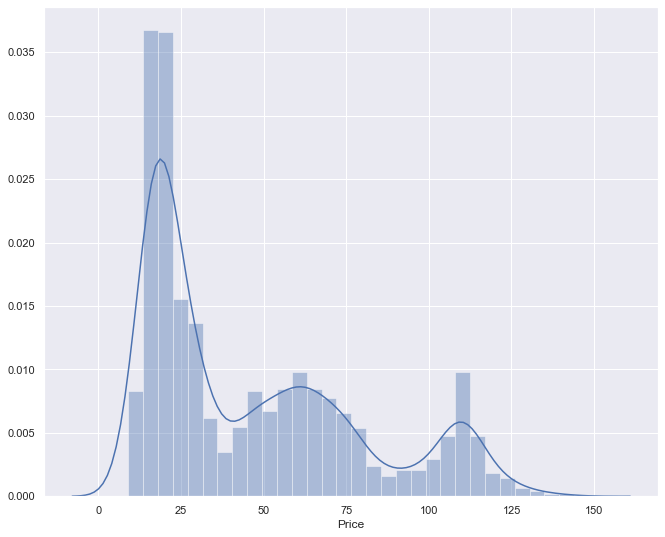

In [28]:
import seaborn as sns
#explanation of seaborn distplot()
# https://seaborn.pydata.org/generated/seaborn.distplot.html
sns.set(rc={'figure.figsize':(11,9)})  
sns.distplot(brent['Price'], bins=30)    #more-- https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


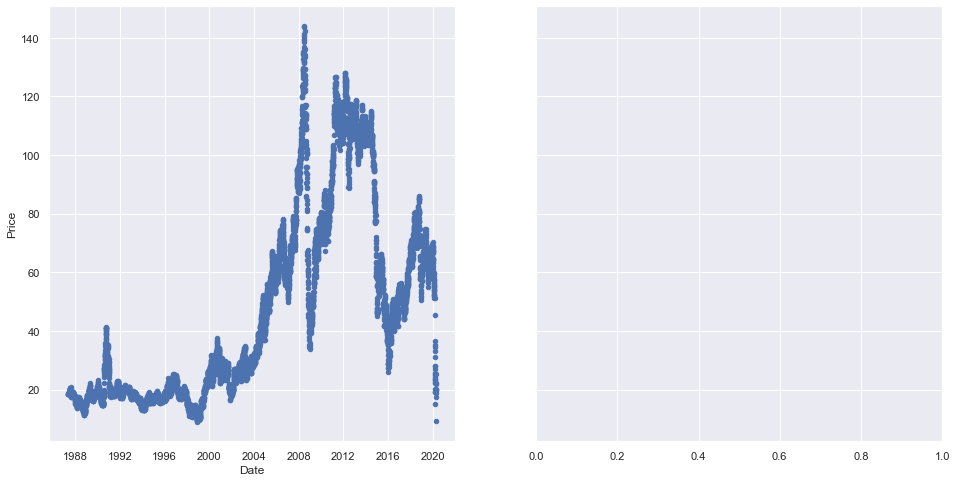

In [29]:
fig, axs = plt.subplots(1, 2, sharey=True)
brent.plot(kind='scatter', x='Date', y='Price', ax=axs[0], figsize=(16, 8))

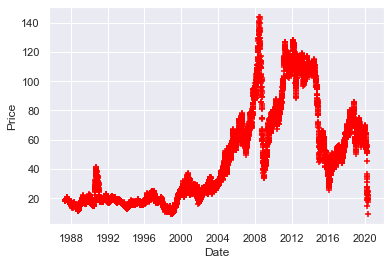

In [30]:
%matplotlib inline
plt.xlabel('Date')
plt.ylabel('Price')
plt.scatter(brent.Date,brent.Price,color='red',marker='+')



In [31]:
X=brent[['Date']]
Y=brent.Price

In [32]:
#Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split,GridSearchCV

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [35]:
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state =42,max_depth=3,n_jobs=-1) 
  
# fit the regressor with x and y data 
rr=regressor.fit(X_train,Y_train) 

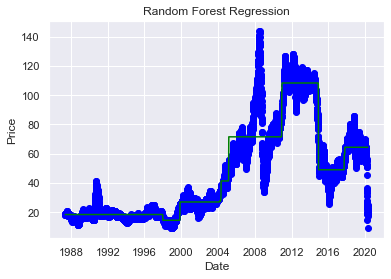

In [36]:
# Scatter plot for original data 
plt.scatter(X,Y, color = 'blue')   
  
# plot predicted data 
plt.plot(X, regressor.predict(X),  
         color = 'green')  
plt.title('Random Forest Regression') 
plt.xlabel('Date') 
plt.ylabel('Price') 
plt.show()

In [37]:
# Calculate mean absolute percentage error (MAPE)
#mape = 100 * (err / test_labels)
# Calculate and display accuracy
#accuracy = 100 - np.mean(mape)
#print('Accuracy:', round(accuracy, 2), '%.')

NameError: name 'err' is not defined

In [38]:
y_pred = regressor.predict(X_test)


In [39]:
# Calculate the absolute errors
errors = abs(y_pred - Y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 5.73 degrees.


In [40]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 86.91 %.


In [41]:
from sklearn import metrics

In [42]:
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

Mean Absolute Error: 5.725338933567639
Mean Squared Error: 106.12366591639939
Root Mean Squared Error: 10.301634138154945


In [43]:
Y_test

4370    40.09
4878    75.12
4046    24.29
3883    27.54
974     18.43
        ...  
7590    52.60
5178    77.87
5153    69.80
2474    21.86
2101    15.78
Name: Price, Length: 1672, dtype: float64

In [44]:
pree=regressor.predict(X_train)

In [45]:
# Calculate the absolute errors
err = abs(pree - Y_train)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(err), 2), 'degrees.')

Mean Absolute Error: 5.72 degrees.


In [46]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (err/ Y_train)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 86.41 %.


In [47]:
from sklearn.model_selection import GridSearchCV

In [40]:

gsc = GridSearchCV(estimator=RandomForestRegressor(),param_grid={'max_depth': range(3,7),'n_estimators': (10, 50, 100, 1000)},cv=5, scoring='neg_mean_squared_error', verbose=0,n_jobs=-1)
model = gsc.fit(X_train,Y_train)
pred = model.predict(X_test)

In [60]:
y_pred = regressor.predict(X_test)
X_test.info


<bound method DataFrame.info of            Date
4370 2004-07-27
4878 2006-07-17
4046 2003-04-25
3883 2002-09-05
974  1991-03-12
...         ...
7590 2017-04-18
5178 2007-09-24
5153 2007-08-17
2474 1997-02-06
2101 1995-08-16

[1672 rows x 1 columns]>

In [49]:
from sklearn.ensemble import RandomForestRegressor
rff = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rff.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [50]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [71]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 27.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 69.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [51]:
rf_random.best_params_

NameError: name 'rf_random' is not defined

In [91]:
  def evaluate(regressor,X_test,Y_test): 
    predictions = regressor.predict(X_test)
    error = abs(predictions - Y_test)
    mape = 100 * np.mean (error / Y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(error)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

  base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
  base_model.fit(X_train,Y_train)
  base_accuracy = evaluate(base_model,X_test,Y_test)    
     
    

Model Performance
Average Error: 0.6693 degrees.
Accuracy = 98.47%.


In [90]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random,X_test,Y_test)

Model Performance
Average Error: 0.6378 degrees.
Accuracy = 98.54%.


In [52]:
import pickle


In [53]:
pickle.dump(regressor, open('model.pkl','wb'))

In [54]:
model = pickle.load(open('model.pkl', 'rb'))

SyntaxError: invalid token (<ipython-input-69-42d6f30374bb>, line 1)